In [3]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import  scale

In [4]:
df=pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
##  EDA


In [7]:
df1=df.drop(['Type'],axis=1)
df1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [10]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
df1=df1.values

In [12]:
df1

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [13]:
## Normalization the Data

In [14]:
df1_normal =scale(df1)

In [15]:
df1_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [16]:
## PCA With Data visualization

In [17]:
pca =PCA()
pca_values =pca.fit_transform(df1_normal)

In [18]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [19]:
pca = PCA(n_components = 7)
pca_values =pca.fit_transform(df1_normal)

In [20]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679])

In [ ]:
#### Cumulative variance

In [21]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.2 , 55.41, 66.53, 73.6 , 80.16, 85.1 , 89.34])

In [22]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [23]:
## Varaiance plot for pca obtained

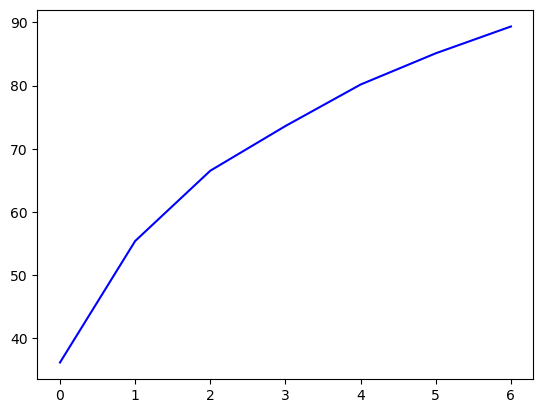

In [24]:
plt.plot(var1,color='blue')

In [25]:
pca_values[:,0:1]

array([[ 3.31675081],
       [ 2.20946492],
       [ 2.51674015],
       [ 3.75706561],
       [ 1.00890849],
       [ 3.05025392],
       [ 2.44908967],
       [ 2.05943687],
       [ 2.5108743 ],
       [ 2.75362819],
       [ 3.47973668],
       [ 1.7547529 ],
       [ 2.11346234],
       [ 3.45815682],
       [ 4.31278391],
       [ 2.3051882 ],
       [ 2.17195527],
       [ 1.89897118],
       [ 3.54198508],
       [ 2.0845222 ],
       [ 3.12440254],
       [ 1.08657007],
       [ 2.53522408],
       [ 1.64498834],
       [ 1.76157587],
       [ 0.9900791 ],
       [ 1.77527763],
       [ 1.23542396],
       [ 2.18840633],
       [ 2.25610898],
       [ 2.50022003],
       [ 2.67741105],
       [ 1.62857912],
       [ 1.90269086],
       [ 1.41038853],
       [ 1.90382623],
       [ 1.38486223],
       [ 1.12220741],
       [ 1.5021945 ],
       [ 2.52980109],
       [ 2.58809543],
       [ 0.66848199],
       [ 3.07080699],
       [ 0.46220914],
       [ 2.10135193],
       [ 1

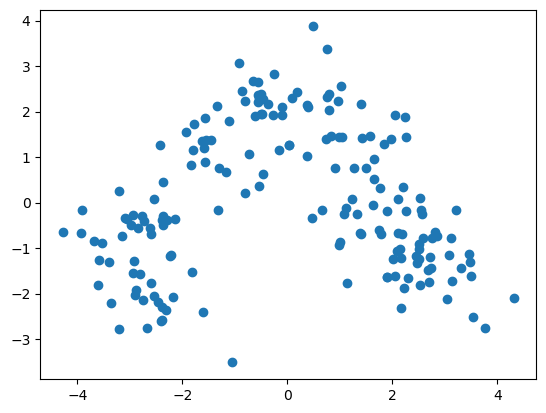

In [26]:
x = pca_values[:,0:1]
y = pca_values[:,1:2]

plt.scatter(x,y)

In [27]:
wineDF=pd.DataFrame(pca_values[:,:],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])

In [28]:
wineDF

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074
...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975


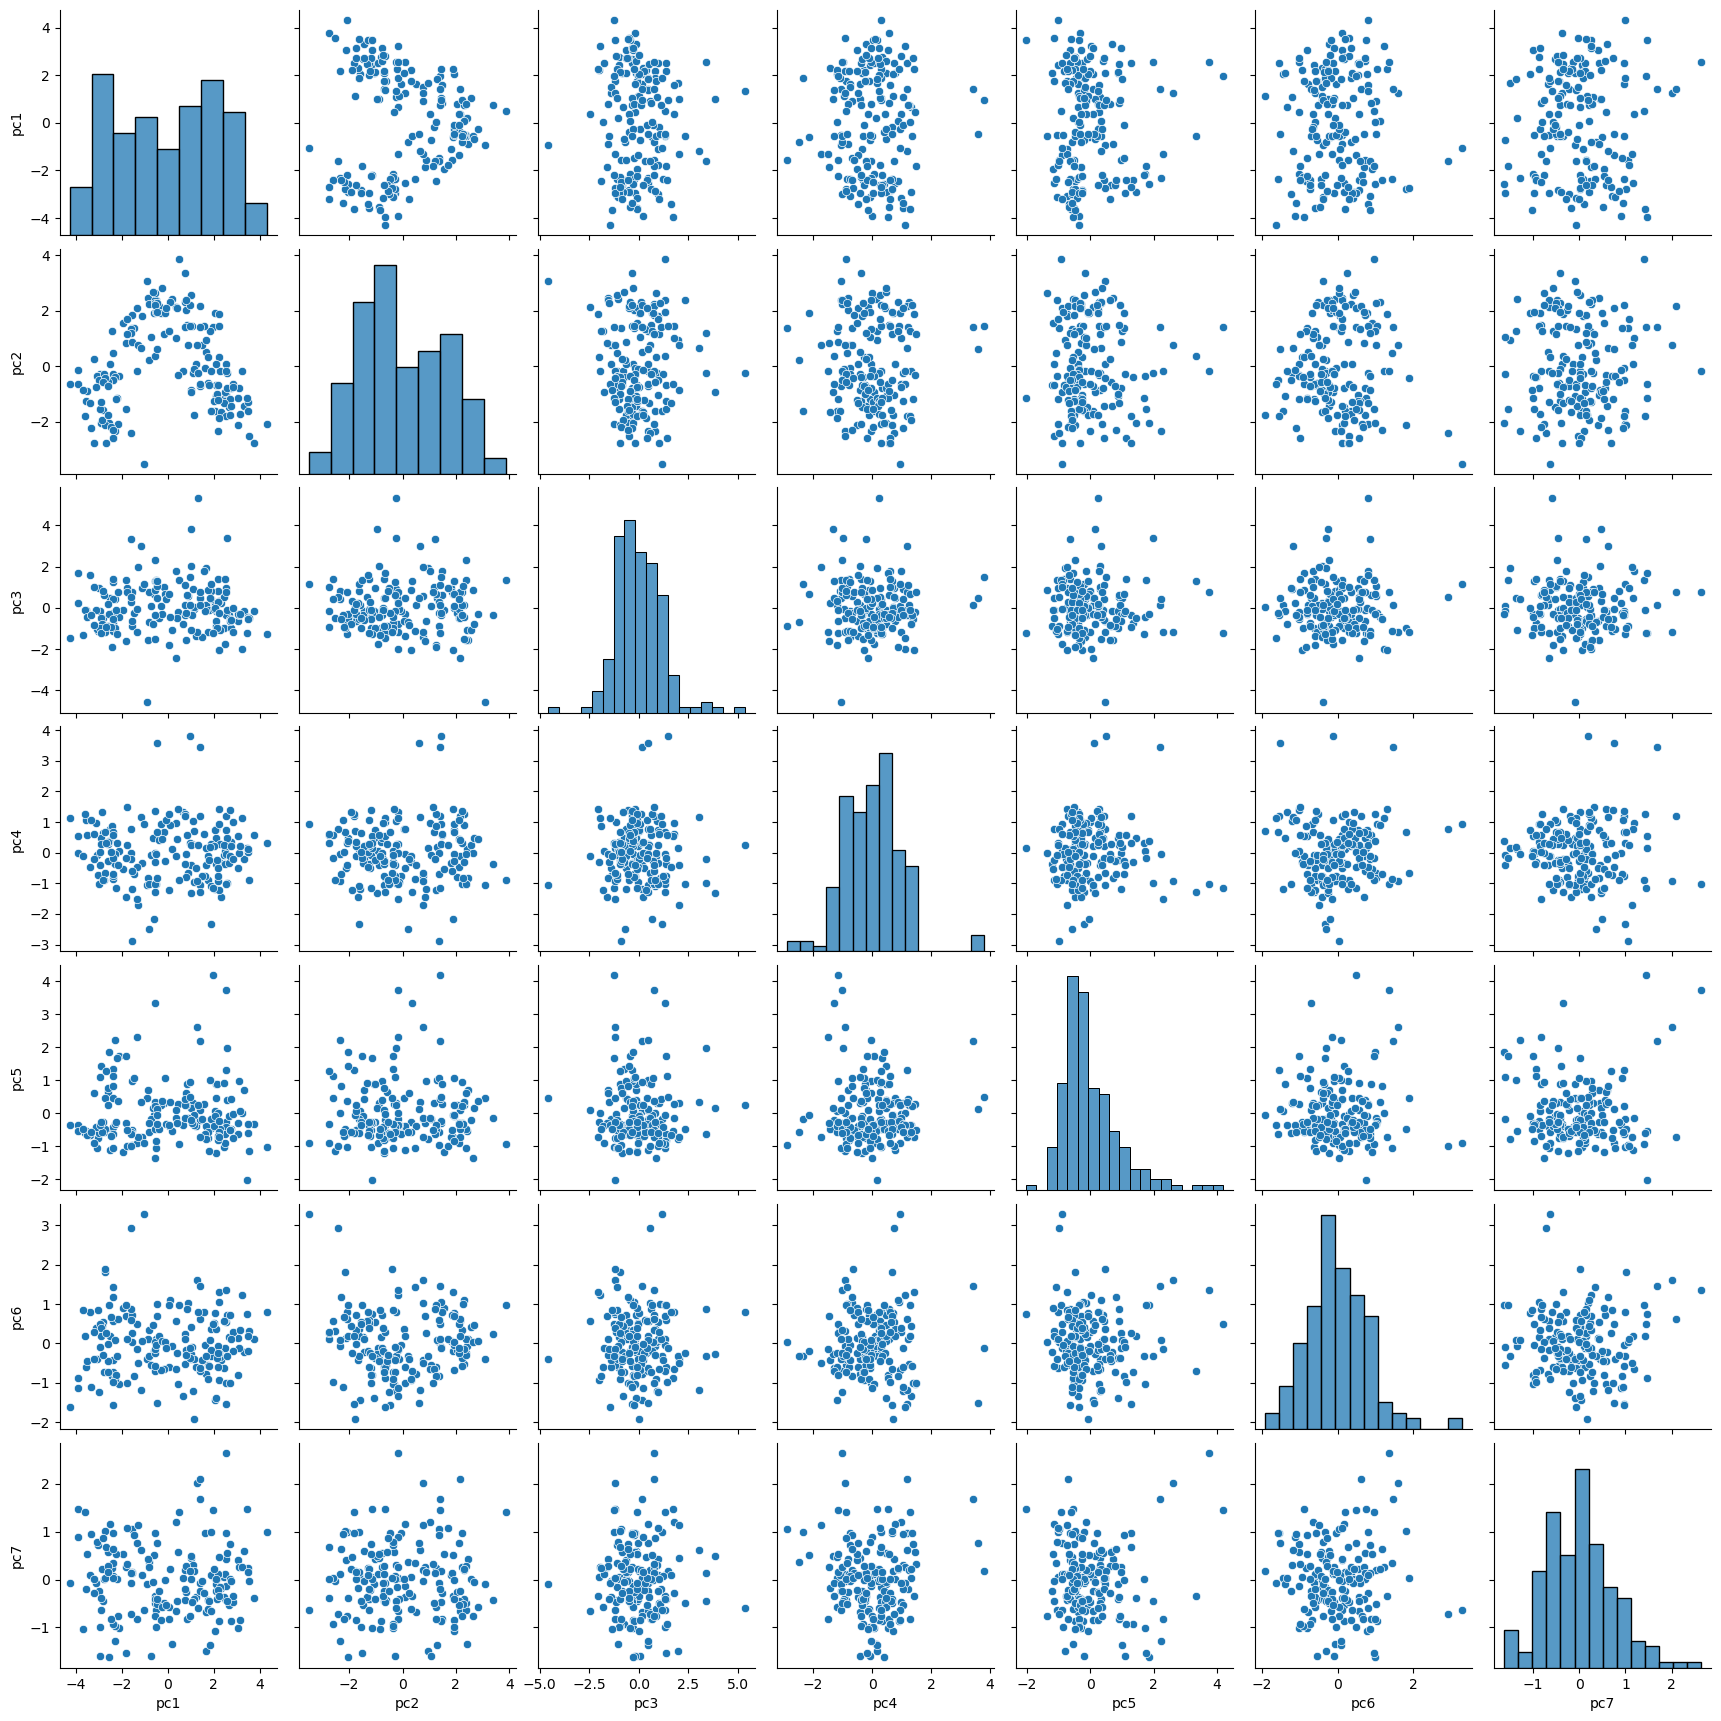

In [32]:
sns.pairplot(wineDF)

In [33]:
### Heirarchical Clustering

In [34]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [35]:
wineF=wineDF.copy()

In [36]:
wineF

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074
...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975


In [37]:
wineF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     178 non-null    float64
 1   pc2     178 non-null    float64
 2   pc3     178 non-null    float64
 3   pc4     178 non-null    float64
 4   pc5     178 non-null    float64
 5   pc6     178 non-null    float64
 6   pc7     178 non-null    float64
dtypes: float64(7)
memory usage: 9.9 KB


In [39]:
wineF.describe()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,6.237208e-17,-3.742325e-17,-2.494883e-18,-2.307767e-17,-3.742325e-17,-6.237208e-17,-1.666991e-17
std,2.175417e+00,1.584639e+00,1.205920e+00,9.613355e-01,9.263092e-01,8.032946e-01,7.444068e-01
min,-4.280639e+00,-3.515090e+00,-4.585064e+00,-2.890120e+00,-2.023127e+00,-1.913868e+00,-1.627192e+00
25%,-2.172762e+00,-1.233675e+00,-8.311875e-01,-6.860538e-01,-5.734337e-01,-5.508706e-01,-4.702604e-01
50%,6.051146e-02,-2.620302e-01,-1.416121e-01,-2.579312e-02,-2.658996e-01,-6.826509e-02,6.680581e-03
75%,2.001293e+00,1.398300e+00,7.600610e-01,5.871144e-01,3.550493e-01,5.434456e-01,4.239493e-01
max,4.312784e+00,3.871784e+00,5.345388e+00,3.790335e+00,4.186657e+00,3.284281e+00,2.644070e+00


<AxesSubplot:xlabel='pc1', ylabel='Density'>

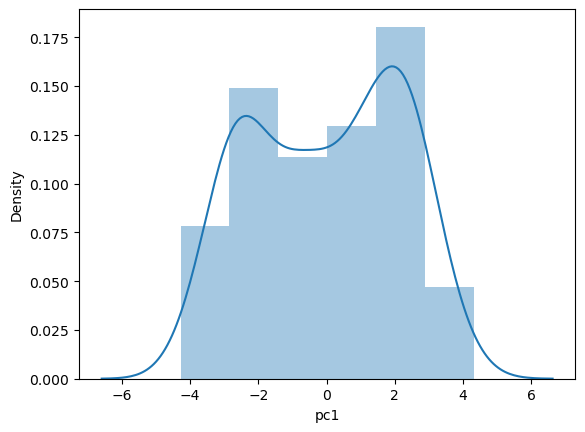

In [46]:
sns.distplot(wineF.pc1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pc2', ylabel='Density'>

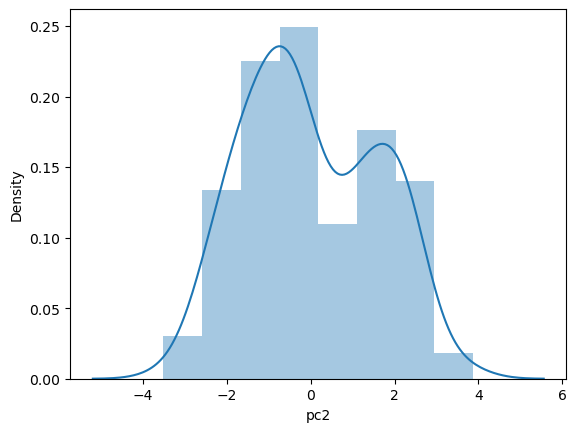

In [48]:
sns.distplot(wineF.pc2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pc2', ylabel='Density'>

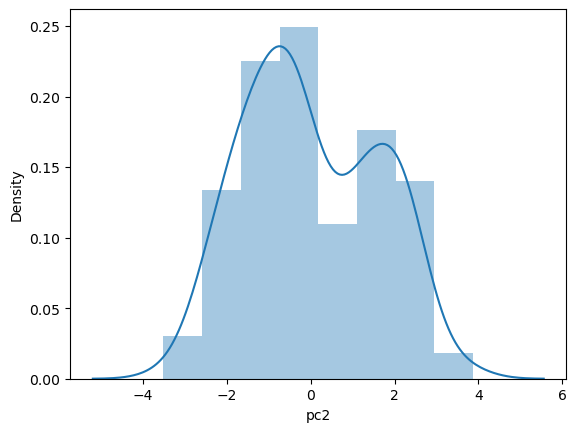

In [49]:
sns.distplot(wineF.pc2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pc4', ylabel='Density'>

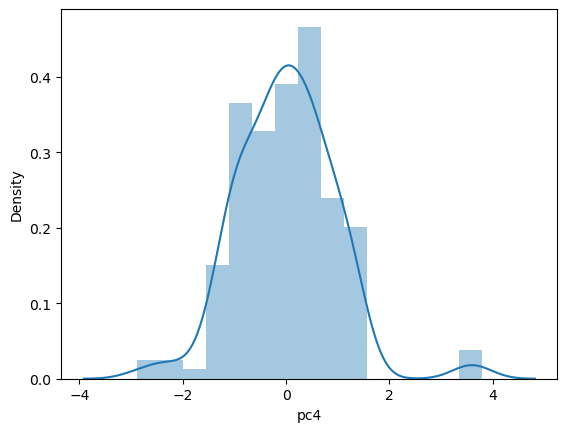

In [50]:
sns.distplot(wineF.pc4)

In [51]:
WINEFc=pd.DataFrame(wineF[['pc1','pc2','pc3']])

In [52]:
WINEFc

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [53]:
#####  Normalization function 
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [55]:
df_norm = minmax_func(WINEFc.iloc[:,:])

In [56]:
df_norm

,pc1,pc2,pc3
0,0.884094,0.280447,0.445028
1,0.755241,0.520989,0.257653
2,0.790998,0.336264,0.560688
3,0.935332,0.102712,0.443975
4,0.615534,0.358103,0.665806
...,...,...,...
173,0.105908,0.175825,0.427221
174,0.195345,0.237971,0.482621
175,0.186515,0.102099,0.366964
176,0.220357,0.164852,0.406262


In [57]:
### Creating Dendrogram

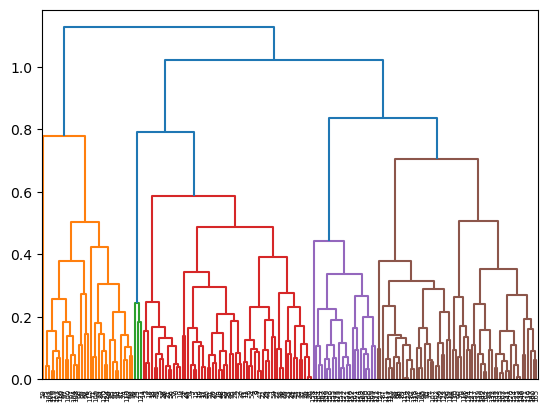

In [58]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [59]:
## creating Clusterings

In [60]:
Fc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
Fc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [61]:
y_Fc = Fc.fit_predict(df_norm)
y_Fc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2,
       1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [62]:
WINEFc['h_clusterid'] = y_Fc
WINEFc

,pc1,pc2,pc3,h_clusterid
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


In [63]:
WINEFc[WINEFc['h_clusterid']==0]

,pc1,pc2,pc3,h_clusterid
60,-1.542480,1.381444,-0.874683,0
61,-1.836250,0.829984,-1.605702,0
64,-0.609681,1.908059,0.679358,0
68,-0.812805,0.220514,-0.707005,0
70,-1.572216,0.884983,-0.628998,0
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


In [64]:
WINEFc[WINEFc['h_clusterid']==1]

,pc1,pc2,pc3,h_clusterid
59,-0.928582,3.073486,-4.585064,1
62,0.030607,1.262786,-1.784408,1
63,2.050262,1.925033,-0.007369,1
66,2.248507,1.884592,-2.031840,1
67,0.183384,2.427146,-1.069746,1
69,1.975620,1.403283,-1.238276,1
71,1.657682,0.956712,1.952584,1
74,1.832568,1.287878,0.458280,1
75,-0.867993,2.444101,-1.563333,1
76,0.370014,2.153907,-2.449386,1


In [65]:
WINEFc[WINEFc['h_clusterid']==2]

,pc1,pc2,pc3,h_clusterid
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2
...,...,...,...,...
65,0.900228,0.763911,0.573361,2
73,2.562227,-0.260199,3.374394,2
78,1.262931,0.770850,-1.184225,2
95,2.543865,-0.169274,0.788697,2


In [66]:
WINEFcMean=WINEFc.groupby('h_clusterid').mean()

In [67]:
WINEFcMean

,pc1,pc2,pc3
h_clusterid,,,
0,-2.050921,-0.138209,0.145108
1,0.692043,2.043865,-0.340533
2,2.238862,-0.878947,-0.008064


In [68]:
WINEFc

,pc1,pc2,pc3,h_clusterid
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


In [69]:
WINEFc['h_clusterid']=WINEFc['h_clusterid'].replace(0, '1')
WINEFc['h_clusterid']=WINEFc['h_clusterid'].replace(1, '2')
WINEFc['h_clusterid']=WINEFc['h_clusterid'].replace(2, '3')
WINEFc

,pc1,pc2,pc3,h_clusterid
0,3.316751,-1.443463,-0.165739,3
1,2.209465,0.333393,-2.026457,3
2,2.516740,-1.031151,0.982819,3
3,3.757066,-2.756372,-0.176192,3
4,1.008908,-0.869831,2.026688,3
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1
174,-2.601956,-1.757229,0.207581,1
175,-2.677839,-2.760899,-0.940942,1
176,-2.387017,-2.297347,-0.550696,1


In [71]:
### KMeans Clustering

In [73]:
wineF

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074
...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975


In [74]:
WINEK=pd.DataFrame(wineF[['pc1','pc2','pc3']])

In [75]:
WINEK

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [80]:
def minmax_func(i):
    X = (i-i.min())/(i.max()-i.min())
    return (X)

In [81]:
def norm_func(i):
    X = (i-i.mean())/(i.std())
    return (X)

In [84]:
X=norm_func(WINEK.iloc[:,:])
X

,pc1,pc2,pc3
0,1.524651,-0.910909,-0.137438
1,1.015651,0.210390,-1.680425
2,1.156900,-0.650717,0.814995
3,1.727056,-1.739432,-0.146106
4,0.463777,-0.548914,1.680616
...,...,...,...
173,-1.549370,-1.398608,-0.284073
174,-1.196072,-1.108915,0.172135
175,-1.230955,-1.742289,-0.780269
176,-1.097269,-1.449760,-0.456661


In [85]:
### Normalization Function

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_WINEK_df = scaler.fit_transform(WINEK.iloc[:,:])

In [88]:
scaled_WINEK_df

array([[ 1.52895179e+00, -9.13478982e-01, -1.37825595e-01],
       [ 1.01851648e+00,  2.10983913e-01, -1.68516534e+00],
       [ 1.16016384e+00, -6.52552421e-01,  8.17294251e-01],
       [ 1.73192758e+00, -1.74433875e+00, -1.46517953e-01],
       [ 4.65085422e-01, -5.50462585e-01,  1.68535731e+00],
       [ 1.40610238e+00, -1.34313751e+00, -5.23394199e-01],
       [ 1.12897840e+00, -7.43490601e-01, -8.12534459e-01],
       [ 9.49356728e-01, -1.01821406e+00,  1.21645371e-01],
       [ 1.15745981e+00, -5.80990809e-01, -1.47270585e+00],
       [ 1.26936420e+00, -4.99586692e-01, -8.18482431e-01],
       [ 1.60408482e+00, -8.24166841e-01, -3.51538969e-01],
       [ 8.08903878e-01, -3.87282859e-01, -9.90312897e-01],
       [ 9.74261323e-01, -4.27613105e-01, -7.19390243e-01],
       [ 1.59413696e+00, -7.15506314e-01, -1.00145446e+00],
       [ 1.98810193e+00, -1.32641441e+00, -1.05104701e+00],
       [ 1.06264288e+00, -1.05212704e+00,  1.81203879e-01],
       [ 1.00122533e+00, -1.47280883e+00

In [90]:
## Wcss to find k value for Clusters

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[531.0, 380.37034196202904, 250.85163265595193, 184.48624053869725, 156.21996765447727, 135.0992153586563, 119.26796388165133, 109.00236966370832, 96.99822686923227, 90.47560845263537]


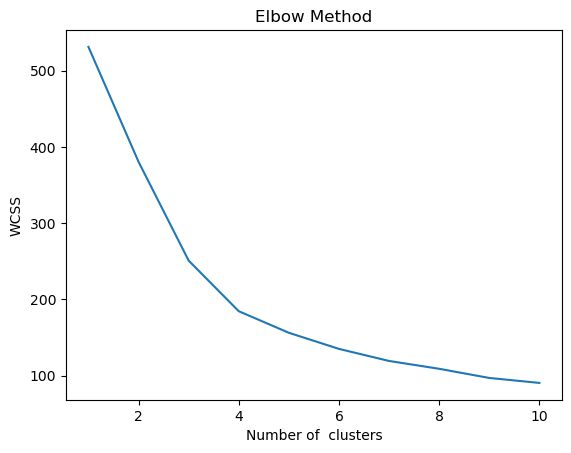

In [94]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(wcss)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of  clusters')
plt.ylabel('WCSS')
plt.show()

In [95]:
## Building Algorithm

In [96]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=0)
clusters_new.fit(X)


KMeans(n_clusters=3, random_state=0)

In [99]:
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [100]:
WINEK['clusterid_new'] = clusters_new.labels_
WINEK

,pc1,pc2,pc3,clusterid_new
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


In [101]:
clusters_new.cluster_centers_

array([[-1.23349172, -0.69401512, -0.20572812],
       [ 1.04578129, -0.57775611, -0.0860657 ],
       [-0.0108886 ,  1.12358852,  0.25053024]])

In [102]:
WINEKmean=WINEK.groupby('clusterid_new').agg(['mean']).reset_index()

In [103]:
WINEKmean

,clusterid_new,pc1,pc2,pc3
,,mean,mean,mean
0,0,-2.683358,-1.099763,-0.248092
1,1,2.275010,-0.915535,-0.103788
2,2,-0.023687,1.780482,0.302119


In [104]:
WINEK['clusterid_new'].value_counts()

2    64
1    62
0    52
Name: clusterid_new, dtype: int64

In [105]:
WINEK['clusterid_new']=WINEK['clusterid_new'].replace(0, '1')
WINEK['clusterid_new']=WINEK['clusterid_new'].replace(1, '2')
WINEK['clusterid_new']=WINEK['clusterid_new'].replace(2, '3')
WINEK

,pc1,pc2,pc3,clusterid_new
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1
174,-2.601956,-1.757229,0.207581,1
175,-2.677839,-2.760899,-0.940942,1
176,-2.387017,-2.297347,-0.550696,1


In [106]:
##### Comparing Clusters obtained with original data wine

In [108]:
df.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [109]:
WINEFc.h_clusterid.value_counts()

1    81
3    64
2    33
Name: h_clusterid, dtype: int64

In [110]:
WINEK.clusterid_new.value_counts()

3    64
2    62
1    52
Name: clusterid_new, dtype: int64